# Interactions - Lab

## Introduction

In this lab, you'll explore interactions in the Ames Housing dataset.

## Objectives

You will be able to:
- Implement interaction terms in Python using the `sklearn` and `statsmodels` packages 
- Interpret interaction variables in the context of a real-world problem 

## Build a baseline model 

You'll use a couple of built-in functions, which we imported for you below: 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

If you still want to build a model in the end, you can do that, but this lab will just focus on finding meaningful insights in interactions and how they can improve $R^2$ values.

In [2]:
regression = LinearRegression()

Create a baseline model which includes all the variables we selected from the Ames housing data set to predict the house prices. Then use 10-fold cross-validation and report the mean $R^2$ value as the baseline $R^2$.

In [3]:
ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
ames_cont = ames[continuous]
ames_cont

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,8450,856,1710,208500
1,9600,1262,1262,181500
2,11250,920,1786,223500
3,9550,961,1717,140000
4,14260,1145,2198,250000
...,...,...,...,...
1455,7917,953,1647,175000
1456,13175,2073,2073,210000
1457,9042,1188,2340,266500
1458,9717,1078,1078,142125


/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


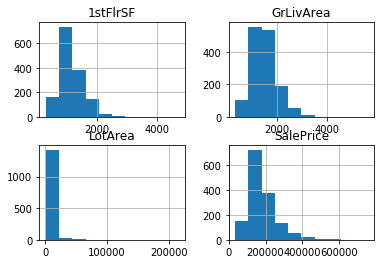

In [5]:
fig = plt.figure()
ax = fig.gca()
ames_cont.hist(ax=ax);
    

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


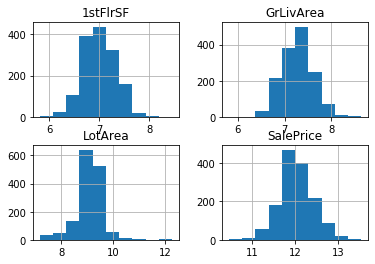

In [6]:
# since the data could be more normal, apply the log transformation and see how it looks
ames_log = np.log(ames_cont)

fig = plt.figure()
ax = fig.gca()
ames_log.hist(ax=ax);

In [7]:
# since the log transformed data is definately more normal, we'll proceed with the transformed data

In [8]:
# deal with the cat vars
bldg_dummies = pd.get_dummies(ames.BldgType, prefix='Bldg', drop_first=True)
kitchen_dummies = pd.get_dummies(ames.KitchenQual, prefix='Kit', drop_first=True)
sale_dummies = pd.get_dummies(ames.SaleType, prefix='SaleT', drop_first=True)
msz_dummies = pd.get_dummies(ames.MSZoning, prefix='MSZ', drop_first=True)
str_dummies = pd.get_dummies(ames.Street, prefix='Str', drop_first=True)
neigh_dummies = pd.get_dummies(ames.Neighborhood, prefix='Neigh', drop_first=True)

In [9]:
ames_fin = pd.concat([ames_log, bldg_dummies, kitchen_dummies, sale_dummies, 
                     msz_dummies, str_dummies, neigh_dummies], axis=1)
ames_fin.head()

,LotArea,1stFlrSF,GrLivArea,SalePrice,Bldg_2fmCon,Bldg_Duplex,Bldg_Twnhs,Bldg_TwnhsE,Kit_Fa,Kit_Gd,...,Neigh_NoRidge,Neigh_NridgHt,Neigh_OldTown,Neigh_SWISU,Neigh_Sawyer,Neigh_SawyerW,Neigh_Somerst,Neigh_StoneBr,Neigh_Timber,Neigh_Veenker
0,9.041922,6.752270,7.444249,12.247694,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9.169518,7.140453,7.140453,12.109011,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9.328123,6.824374,7.487734,12.317167,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9.164296,6.867974,7.448334,11.849398,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.565214,7.043160,7.695303,12.429216,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [10]:
X = ames_fin.drop(['SalePrice'], axis=1)
y = ames_fin.SalePrice

In [11]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.score(X, y)

0.8389500211207064

In [12]:
cross_v = KFold(n_splits=10, shuffle=True, random_state=1)
kfold_r2 = round(np.mean(cross_val_score(regression, X, y, scoring='r2', cv=cross_v)), 3)
print(f'R-squared {kfold_r2}')

R-squared 0.817


## See how interactions improve your baseline

Next, create all possible combinations of interactions, loop over them and add them to the baseline model one by one to see how they affect the $R^2$. We'll look at the 3 interactions which have the biggest effect on our $R^2$, so print out the top 3 combinations.

You will create a `for` loop to loop through all the combinations of 2 predictors. You can use `combinations` from itertools to create a list of all the pairwise combinations. To find more info on how this is done, have a look [here](https://docs.python.org/2/library/itertools.html).

Since there are so many different neighbourhoods we will exclude

In [13]:
from itertools import combinations

In [14]:
# code to find top interactions by R^2 value here

column_combos = combinations(X.columns, 2)

In [15]:
interactions = []

data = X.copy()

for combo in column_combos:
    data['interaction'] = data[combo[0]] * data[combo[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=cross_v))
    if score > kfold_r2:
        # save the interaction info
        interactions.append((combo[0], combo[1], round(score, 3)))

In [16]:
print('The top three interactions are:')
print(sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

The top three interactions are:
[('LotArea', 'Neigh_BrkSide', 0.82), ('LotArea', 'Neigh_Mitchel', 0.82), ('GrLivArea', 'Bldg_Duplex', 0.82)]


It looks like the top interactions involve the Neighborhood_Edwards feature so lets add the interaction between LotArea and Edwards to our model.

We can interpret this feature as the relationship between LotArea and SalePrice when the house is in Edwards or not.

## Visualize the Interaction

Separate all houses that are located in Edwards and those that are not. Run a linear regression on each population against `SalePrice`. Visualize the regression line and data points with price on the y axis and LotArea on the x axis.

In [17]:
# Visualization code here

# ames_fin['LotAreaVsEdwards'] = ames_fin['LotArea'] * ames_fin['Neigh_Edwards']
in_edwards = ames_fin.loc[ames_fin['Neigh_Edwards'] == 1, ['LotArea', 'SalePrice']]
not_edwards = ames_fin.loc[ames_fin['Neigh_Edwards'] == 0, ['LotArea', 'SalePrice']]



In [18]:
not_edwards

,LotArea,SalePrice
0,9.041922,12.247694
1,9.169518,12.109011
2,9.328123,12.317167
3,9.164296,11.849398
4,9.565214,12.429216
...,...,...
1454,8.922658,12.128111
1455,8.976768,12.072541
1456,9.486076,12.254863
1457,9.109636,12.493130


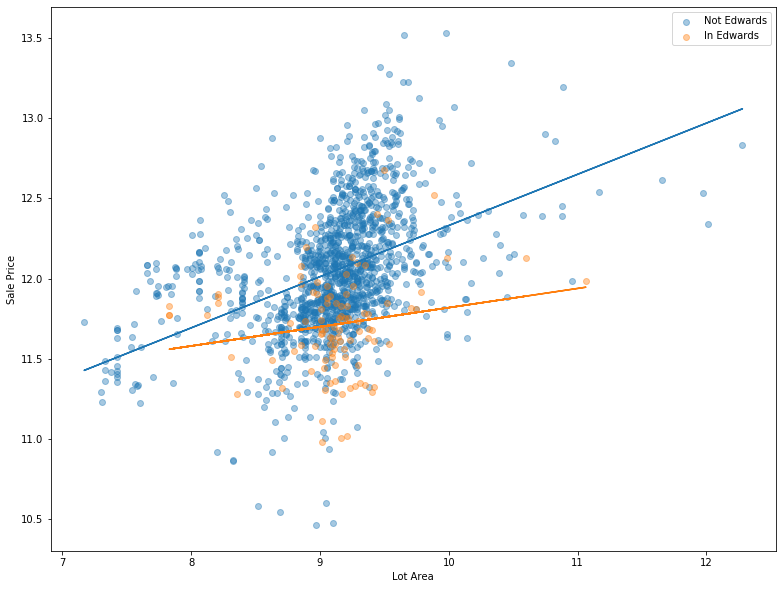

In [19]:
# create a linear regression for the houses in the Edwards Neighborhood
linreg_in_edwards = LinearRegression()
linreg_in_edwards.fit(np.array(in_edwards['LotArea']).reshape(-1, 1), np.array(in_edwards['SalePrice']))
preds_in_edwards = linreg_in_edwards.predict(np.array(in_edwards['LotArea']).reshape(-1, 1))

# create a linear regression for the houses NOT in the Edwards Neighborhood
linreg_not_edwards = LinearRegression()
linreg_not_edwards.fit(np.array(not_edwards['LotArea']).reshape(-1, 1), np.array(not_edwards['SalePrice']))
preds_not_edwards = linreg_not_edwards.predict(np.array(not_edwards['LotArea']).reshape(-1, 1))

# plot the Lot Area vs. Sale Price for both groups
fig, ax = plt.subplots(figsize=(13, 10))
ax.scatter(not_edwards['LotArea'], not_edwards['SalePrice'], label='Not Edwards', alpha=0.4)
ax.scatter(in_edwards['LotArea'], in_edwards['SalePrice'], label='In Edwards', alpha=0.4)

# plot the linear regression for both groups
plt.plot(not_edwards['LotArea'], preds_not_edwards)
plt.plot(in_edwards['LotArea'], preds_in_edwards)

plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.legend()
plt.show()

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [20]:
X['LotAreaVsEdwards'] = X['LotArea'] * X['Neigh_Edwards']
X.head()

,LotArea,1stFlrSF,GrLivArea,Bldg_2fmCon,Bldg_Duplex,Bldg_Twnhs,Bldg_TwnhsE,Kit_Fa,Kit_Gd,Kit_TA,...,Neigh_NridgHt,Neigh_OldTown,Neigh_SWISU,Neigh_Sawyer,Neigh_SawyerW,Neigh_Somerst,Neigh_StoneBr,Neigh_Timber,Neigh_Veenker,LotAreaVsEdwards
0,9.041922,6.752270,7.444249,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
1,9.169518,7.140453,7.140453,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0.0
2,9.328123,6.824374,7.487734,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
3,9.164296,6.867974,7.448334,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,9.565214,7.043160,7.695303,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [21]:
X.LotAreaVsEdwards.describe()

count    1460.000000
mean        0.624109
std         2.305550
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.064871
Name: LotAreaVsEdwards, dtype: float64

In [22]:
score = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=cross_v))
print(score)

0.8188308850559455


Our $R^2$ has increased considerably! Let's have a look in `statsmodels` to see if this interactions are significant.

In [23]:
# features = '+'.join(X.columns)
# f = 'SalePrice ~ ' + features
import statsmodels.api as sm
features_int = sm.add_constant(X)
model = sm.OLS(y, features_int).fit()
model.summary()

/Users/freethrall/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:16:18   Log-Likelihood:                 613.09
No. Observations:                1460   AIC:                            -1128.
Df Residuals:                    1411   BIC:                            -869.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.6048      0.201     32.922      0.000       6.211       6.998
LotArea              0.0937      0.015      6.353      0.000       0.065       0.123
1stFlrSF             0.1761      0.020      8.829      0.000       0.137       0.215
GrLivArea            0.4503      0.019     24.240      0.000       0.414       0.487
Bldg_2fmCon         -0.0713      0.031     -2.278      0.023      -0.133      -0.010
Bldg_Duplex         -0.1664      0.024     -6.803      0.000      -0.214      -0.118
Bldg_Twnhs          -0.0648      0.037     -1.761      0.079      -0.137       0.007
Bldg_TwnhsE         -0.0189      0.024     -0.797      0.425      -0.065       0.028
Kit_Fa              -0.3984      0.035    -11.373      0.000      -0.467      -0.330
Kit_Gd              -0.1571      0.020     -7.889      0.000      -0.196      -0.118
Kit_TA              -0.2710      0.022    -12.361      0.000      -0.314      -0.228
SaleT_CWD            0.0890      0.085      1.043      0.297      -0.078       0.256
SaleT_Con            0.2316      0.121      1.920      0.055      -0.005       0.468
SaleT_ConLD          0.1251      0.062      2.032      0.042       0.004       0.246
SaleT_ConLI          0.0250      0.077      0.323      0.747      -0.127       0.177
SaleT_ConLw          0.0109      0.078      0.140      0.889      -0.141       0.163
SaleT_New            0.1198      0.031      3.831      0.000       0.058       0.181
SaleT_Oth            0.0355      0.097      0.364      0.716      -0.155       0.226
SaleT_WD             0.0686      0.026      2.647      0.008       0.018       0.119
MSZ_FV               0.4592      0.077      5.975      0.000       0.308       0.610
MSZ_RH               0.3606      0.077      4.678      0.000       0.209       0.512
MSZ_RL               0.4179      0.064      6.495      0.000       0.292       0.544
MSZ_RM               0.4430      0.060      7.363      0.000       0.325       0.561
Str_Pave            -0.0817      0.071     -1.142      0.253      -0.222       0.059
Neigh_Blueste        0.0552      0.126      0.437      0.662      -0.192       0.303
Neigh_BrDale        -0.1492      0.068     -2.191      0.029      -0.283      -0.016
Neigh_BrkSide       -0.2599      0.054     -4.777      0.000      -0.367      -0.153
Neigh_ClearCr       -0.1081      0.057     -1.882      0.060      -0.221       0.005
Neigh_CollgCr       -0.0421      0.047     -0.894      0.371      -0.135       0.050
Neigh_Crawfor       -0.0468      0.051     -0.913      0.361      -0.147       0.054
Neigh_Edwards        1.3089      0.345      3.793      0.000       0.632       1.986
Neigh_Gilbert       -0.0532      0.050     -1.062      0.289      -0.152       0.045
Neigh_IDOTRR        -0.3762      0.063     -5.931      0.000      -0.501      -0.252
Neigh_MeadowV       -0.

What is your conclusion here?

In [24]:
# formulate your conclusion
# the interaction between LotArea and the Edwards Neighborhood is significant and adds to the model's precsion

## Summary

You should now understand how to include interaction effects in your model! As you can see, interactions can have a strong impact on linear regression models, and they should always be considered when you are constructing your models.